<a href="https://colab.research.google.com/github/lvisdd/object_detection_tutorial/blob/master/object_detection_tutorial_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# restart (or reset) your virtual machine
#!kill -9 -1

# Mount Google Drive

In [1]:
# Mount Google Drive
# [Go to this URL in a browser: URL] -> Authorization Code
# [Enter your authorization code:]

#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls -ld "/content/drive/My Drive/"

drwx------ 13 root root 4096 Aug  6 09:21 '/content/drive/My Drive/'


# [Tensorflow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection)

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 29209 (delta 48), reused 38 (delta 24), pack-reused 29130
Receiving objects: 100% (29209/29209), 509.88 MiB | 14.53 MiB/s, done.
Resolving deltas: 100% (18172/18172), done.
Checking out files: 100% (3053/3053), done.


In [0]:
#%cd models
#!git checkout r1.13.0

In [4]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib

Selecting previously unselected package python-bs4.
(Reading database ... 131289 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

# COCO API installation

In [0]:
!pip install -q pycocotools

In [0]:
#%cd /content

In [0]:
#!git clone https://github.com/cocodataset/cocoapi.git
#%cd cocoapi/PythonAPI
#!make
#!cp -r pycocotools /content/models/research/

# Protobuf Compilation

In [6]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


# Add Libraries to PYTHONPATH

In [7]:
%cd /content/models/research/
%env PYTHONPATH=/env/python:/content/models/research:/content/models/research/slim:/content/models/research/object_detection
%env

/content/models/research
env: PYTHONPATH=/env/python:/content/models/research:/content/models/research/slim:/content/models/research/object_detection


{'CLICOLOR': '1',
 'CLOUDSDK_CONFIG': '/content/.config',
 'COLAB_GPU': '1',
 'CUDA_PKG_VERSION': '10-0=10.0.130-1',
 'CUDA_VERSION': '10.0.130',
 'CUDNN_VERSION': '7.6.2.24',
 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}',
 'DEBIAN_FRONTEND': 'noninteractive',
 'ENV': '/root/.bashrc',
 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16',
 'GIT_PAGER': 'cat',
 'GLIBCPP_FORCE_NEW': '1',
 'GLIBCXX_FORCE_NEW': '1',
 'HOME': '/root',
 'HOSTNAME': '9f1867fe6777',
 'JPY_PARENT_PID': '38',
 'LANG': 'en_US.UTF-8',
 'LAST_FORCED_REBUILD': '20190507',
 'LD_LIBRARY_PATH': '/usr/lib64-nvidia',
 'LD_PRELOAD': '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4',
 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
 'NCCL_VERSION': '2.4.7',
 'NO_GCE_CHECK': 'True',
 'NVIDIA_DRIVER_CAPABILITIES': 'compute,utility',
 'NVIDIA_REQUIRE_CUDA': 'cuda>=10.0 brand=tesla,driver>=384,dr

In [0]:
import os
import sys
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
sys.path.append("/content/models/research/slim/")

# Testing the Installation

In [9]:
!python object_detection/builders/model_builder_test.py

W0806 09:22:37.592212 139899569461120 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0806 09:22:37.933890 139899569461120 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0806 09:22:37.990735 139899569461120 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

Running tests under Python 3.6.8: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK

# [TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10](https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10)

## Download this tutorial's repository from GitHub

In [10]:
%cd /content

/content


In [11]:
!git clone https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10.git

Cloning into 'TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1103 (delta 34), reused 3 (delta 1), pack-reused 1045
Receiving objects: 100% (1103/1103), 57.62 MiB | 11.59 MiB/s, done.
Resolving deltas: 100% (549/549), done.


In [12]:
%cd TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10

/content/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10


In [0]:
!cp -pr ./* /content/models/research/object_detection/

## Download the Faster-RCNN-Inception-V2-COCO model from TensorFlow's model zoo

In [14]:
%cd /content/models/research/object_detection/

/content/models/research/object_detection


In [15]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2019-08-06 09:26:01--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   147MB/s    in 1.0s    

2019-08-06 09:26:03 (147 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



In [16]:
!tar zxvf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


## Generate Training Data

In [17]:
!python xml_to_csv.py

Successfully converted xml to csv.
Successfully converted xml to csv.


In [19]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

W0806 09:29:16.263836 140108494743424 deprecation_wrapper.py:119] From generate_tfrecord.py:110: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0806 09:29:16.264751 140108494743424 deprecation_wrapper.py:119] From generate_tfrecord.py:96: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

W0806 09:29:16.454539 140108494743424 deprecation_wrapper.py:119] From generate_tfrecord.py:55: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/models/research/object_detection/train.record
W0806 09:29:20.944627 140294400214912 deprecation_wrapper.py:119] From generate_tfrecord.py:110: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0806 09:29:20.945324 140294400214912 deprecation_wrapper.py:119] From generate_tfrecord.py:96: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

W0806 0

In [35]:
!perl -pi.bak -e "s|C:/tensorflow1|/content|g" ./training/faster_rcnn_inception_v2_pets.config
!sed -i -e '91,94d' ./training/faster_rcnn_inception_v2_pets.config
!diff ./training/faster_rcnn_inception_v2_pets.config.bak ./training/faster_rcnn_inception_v2_pets.config

92,95d91
<             step: 0
<             learning_rate: .0002
<           }
<           schedule {
110c106
<   fine_tune_checkpoint: "C:/tensorflow1/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt"
---
>   fine_tune_checkpoint: "/content/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt"
126c122
<     input_path: "C:/tensorflow1/models/research/object_detection/train.record"
---
>     input_path: "/content/models/research/object_detection/train.record"
128c124
<   label_map_path: "C:/tensorflow1/models/research/object_detection/training/labelmap.pbtxt"
---
>   label_map_path: "/content/models/research/object_detection/training/labelmap.pbtxt"
140c136
<     input_path: "C:/tensorflow1/models/research/object_detection/test.record"
---
>     input_path: "/content/models/research/object_detection/test.record"
142c138
<   label_map_path: "C:/tensorflow1/models/research/object_detection/training/labelmap.pbtxt"
---
>

In [0]:
#!mv ./training/faster_rcnn_inception_v2_pets.config.bak ./training/faster_rcnn_inception_v2_pets.config

## Run the Training

In [36]:
#python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config
!python model_main.py \
    --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config \
    --model_dir=training/ \
    --train_batch_size=8 \
    --num_train_steps=40000 \
    --sample_1_of_n_eval_examples=1 \
    --alsologtostderr

W0806 10:09:18.413808 140312169301888 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0806 10:09:18.446432 140312169301888 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0806 10:09:18.458679 140312169301888 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0806 10:09:18.471459 140312169301888 deprecation_wrapper.py:119] From model_main.py:109: The name tf.app.run is deprecated. Please use tf.compat.v1.app

## Export Inference Graph

In [37]:
!python export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path training/faster_rcnn_inception_v2_pets.config \
    --trained_checkpoint_prefix training/model.ckpt-40000 \
    --output_directory inference_graph

W0806 13:57:11.027749 140382797662080 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0806 13:57:11.039624 140382797662080 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0806 13:57:11.052144 140382797662080 deprecation_wrapper.py:119] From export_inference_graph.py:162: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0806 13:57:11.052890 140382797662080 deprecation_wrapper.py:119] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0806 13:57:11.059025 140382797662080 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:381: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

W

# Object Detection Demo
Welcome to the object detection inference walkthrough!  This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image. Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md) before you start.

# Imports

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')


## Env setup

In [0]:
# This is needed to display the images.
#%matplotlib inline

## Object detection imports
Here are the imports from the object detection module.

In [0]:
from utils import label_map_util

from utils import visualization_utils as vis_util

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_FROZEN_GRAPH` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [0]:
# What model to download.
#MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
#MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
#PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_FROZEN_GRAPH = 'inference_graph/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
#PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')
PATH_TO_LABELS = 'training/labelmap.pbtxt'

## Download Model

In [0]:
#opener = urllib.request.URLopener()
#opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
#tar_file = tarfile.open(MODEL_FILE)
#for file in tar_file.getmembers():
#  file_name = os.path.basename(file.name)
#  if 'frozen_inference_graph.pb' in file_name:
#    tar_file.extract(file, os.getcwd())

## Load a (frozen) Tensorflow model into memory.

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [43]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

W0806 14:08:05.833004 139816369944448 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/label_map_util.py:137: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



## Helper code

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
#PATH_TO_TEST_IMAGES_DIR = 'test_images'
#TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]
TEST_IMAGE_PATHS = ['test1.JPG']

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [0]:
# This is needed to display the images.
%matplotlib inline

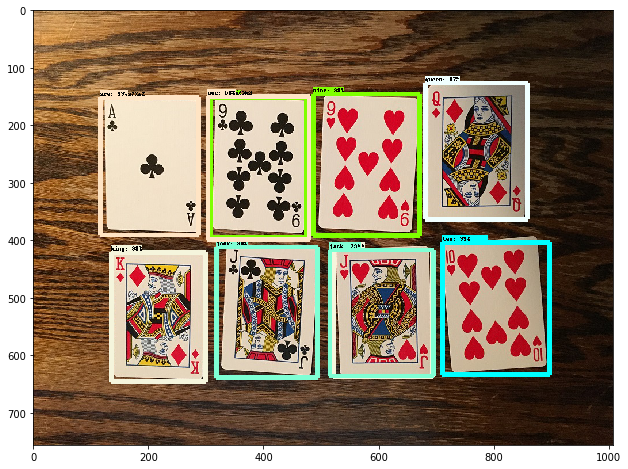

In [48]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)